# **Data Preprocessing & Modeling**

### **The main objectives of preprocessing & modeling are as follows:**

**1. Creating Target Column:**
    
   * Creating a target column to determine if a restaurant's success is considered good (1) for a rating >= 3.75 or not (0).
    
**2. Removing Irrelevant Columns:**
    
  * Checking the dataset for irrelevant columns that do not serve our prediction of restaurant success and looking for duplications

**3. Data Splitting and Class Imbalance:**
    
   * Dividing the data set to features (x) and the target (y), then checking for imbalances in the target class.
    
**4. Handling Categorical Variables:**
    
   * Handling categorical variables using different methods like binary encoding and CatBoostEncoder.
    
**5. Correlation Analysis and Feature Selection:**
    
   *  Creating a correlation heatmap after encoding to check if there are two features highly correlated with each other and dealing with that.

**6. Encoder Creation and Evaluation:**
   
   * Creating an encoder using a column transformer to use it in a pipeline with different encoder types and then checking model accuracy.

**7. Pipeline Creation and Model Evaluation:**
    
   * Creating a pipeline using different encoders, scalers, and various types of models for evaluation.

**8. Hyperparameter Tuning:**
    
   * Utilizing RandomizedSearchCV for hyperparameter tuning for better performance and generalization of the model.

**9. Model Saving and Deployment Preparation:**
    
   * Using joblib to dump the model with the best estimator, column names (features), and creating a dummy file dictionary to maintain code clarity during the deployment step.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from category_encoders import TargetEncoder,CountEncoder,BinaryEncoder,CatBoostEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,make_scorer

import joblib

In [2]:
# loading the dataset.
data = pd.read_csv('../data/processed/cleaned_data.csv')

In [3]:
# Geitting Information about the Data
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41202 entries, 0 to 41201
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   address                     41202 non-null  object 
 1   name                        41202 non-null  object 
 2   online_order                41202 non-null  int64  
 3   book_table                  41202 non-null  int64  
 4   rate                        41202 non-null  float64
 5   votes                       41202 non-null  int64  
 6   location                    41202 non-null  object 
 7   rest_type                   41202 non-null  object 
 8   cuisines                    41202 non-null  object 
 9   approx_cost_for_two_people  41202 non-null  int64  
 10  listed_in_type              41202 non-null  object 
 11  listed_in_city              41202 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 3.8+ MB


In [4]:
#checking for duplication in data 
data.duplicated().sum()

0

## 1. Creating Target columns

In [5]:
# creating Target columns to determine if a restaurant success is considered good (1) for rate >= 3.75 or not (0) 
data['target'] = data.rate.apply(lambda x: 1 if x >= 3.75 else 0)
data.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost_for_two_people,listed_in_type,listed_in_city,target
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Chinese, Mughlai, North Indian",800,Buffet,Banashankari,1
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari,1
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Italian, Mexican",800,Buffet,Banashankari,1
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"North Indian, South Indian",300,Buffet,Banashankari,0
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari,1


## 2. Removing Irrelevant Columns:
* Checking the dataset for irrelevant columns that do not serve our prediction of restaurant success and looking for duplications.

In [6]:
# veiwing the head of the data the first 5 rows
data.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost_for_two_people,listed_in_type,listed_in_city,target
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Chinese, Mughlai, North Indian",800,Buffet,Banashankari,1
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari,1
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Italian, Mexican",800,Buffet,Banashankari,1
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"North Indian, South Indian",300,Buffet,Banashankari,0
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari,1


In [7]:
# statistcal description for numeric features
round(data.describe(),2)

,online_order,book_table,rate,votes,approx_cost_for_two_people,target
count,41202.00,41202.00,41202.00,41202.00,41202.0,41202.00
mean,0.66,0.15,3.68,351.97,603.5,0.49
std,0.47,0.36,0.45,883.35,464.6,0.50
min,0.00,0.00,1.80,0.00,40.0,0.00
25%,0.00,0.00,3.40,21.00,300.0,0.00
50%,1.00,0.00,3.70,73.00,500.0,0.00
75%,1.00,0.00,4.00,277.00,750.0,1.00
max,1.00,1.00,4.90,16832.00,6000.0,1.00


In [8]:
# statistcal description for categorical features
data.describe(include="O")

,address,name,location,rest_type,cuisines,listed_in_type,listed_in_city
count,41202,41202,41202,41202,41202,41202,41202
unique,8784,6574,92,66,1688,7,30
top,Delivery Only,Cafe Coffee Day,BTM,Quick Bites,"Chinese, North Indian",Delivery,BTM
freq,86,86,3873,13866,2284,20410,2578


### * From the above and keeping the aim of our model in mind, we can notice that:

Not all features will serve our aim, as we aim to create a general model that can predict the success or goodness of restaurants in Bangalore before establishment to aid in planning. Considering this, columns like 'address' have high unique vlaues of 8784 also our aim is predict good location rather than address,'name' have no relevance in predicting the success or failure of restaurants in Bangalore. Also, 'rate' and 'votes' are collected after the project is run, not before. 
Then, the following columns are not useful for the aim of this model and are better to be dropped:
['address','name', 'rate', 'votes']

In [9]:
# dropping unnecessary columns for the model from data frame
data.drop(['address','name', 'rate', 'votes'],axis=1, inplace=True)

In [10]:
#checking for duplication in data 
data.duplicated().sum()

1252

In [11]:
# Drop duplicates and reset the index
data = data.drop_duplicates().reset_index(drop=True)

In [12]:
#checking for duplication in data 
data.duplicated().sum()

0

In [13]:
# getting copy of the data set
df = data.copy()

In [14]:
# checking data info after dropping the useless columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39950 entries, 0 to 39949
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   online_order                39950 non-null  int64 
 1   book_table                  39950 non-null  int64 
 2   location                    39950 non-null  object
 3   rest_type                   39950 non-null  object
 4   cuisines                    39950 non-null  object
 5   approx_cost_for_two_people  39950 non-null  int64 
 6   listed_in_type              39950 non-null  object
 7   listed_in_city              39950 non-null  object
 8   target                      39950 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 2.7+ MB


### 3. Data Splitting and Class Imbalance:
* Dividing the data set to features (x) and the target (y), then checking for imbalances in the target class.

In [15]:
# divede the data fram to x = features & y = target
x = df.drop("target", axis = 1)
y = df["target"]

In [16]:
# checking the balance of the data
y.value_counts()

0    20216
1    19734
Name: target, dtype: int64

* The target almost balanced and no need to maintain it.

### 4. Handling Categorical Variables:
* Handling categorical variables using different methods like binary encoding and CatBoostEncoder.
* From the previous statistics and analysis the Categorical features have high unique values that is why I am going to use method like binary, target mean encoding to avoid high cardinality after encoding.

In [17]:
# Identify categorical columns
categorical_cols = x.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['location', 'rest_type', 'cuisines', 'listed_in_type', 'listed_in_city']

In [18]:
Binary_encoder = BinaryEncoder(cols=categorical_cols,return_df=True)
x_encoded = Binary_encoder.fit_transform(x,y)
x_encoded.head()

,online_order,book_table,location_0,location_1,location_2,location_3,location_4,location_5,location_6,rest_type_0,...,cuisines_10,approx_cost_for_two_people,listed_in_type_0,listed_in_type_1,listed_in_type_2,listed_in_city_0,listed_in_city_1,listed_in_city_2,listed_in_city_3,listed_in_city_4
0,1,1,0,0,0,0,0,0,1,0,...,1,800,0,0,1,0,0,0,0,1
1,1,0,0,0,0,0,0,0,1,0,...,0,800,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,0,0,1,0,...,1,800,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1,0,...,0,300,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,...,1,600,0,0,1,0,0,0,0,1


### 5. Correlation Analysis and Feature Selection:
* After encoding to check if there are tow features highly correlated to each other and deal with this.

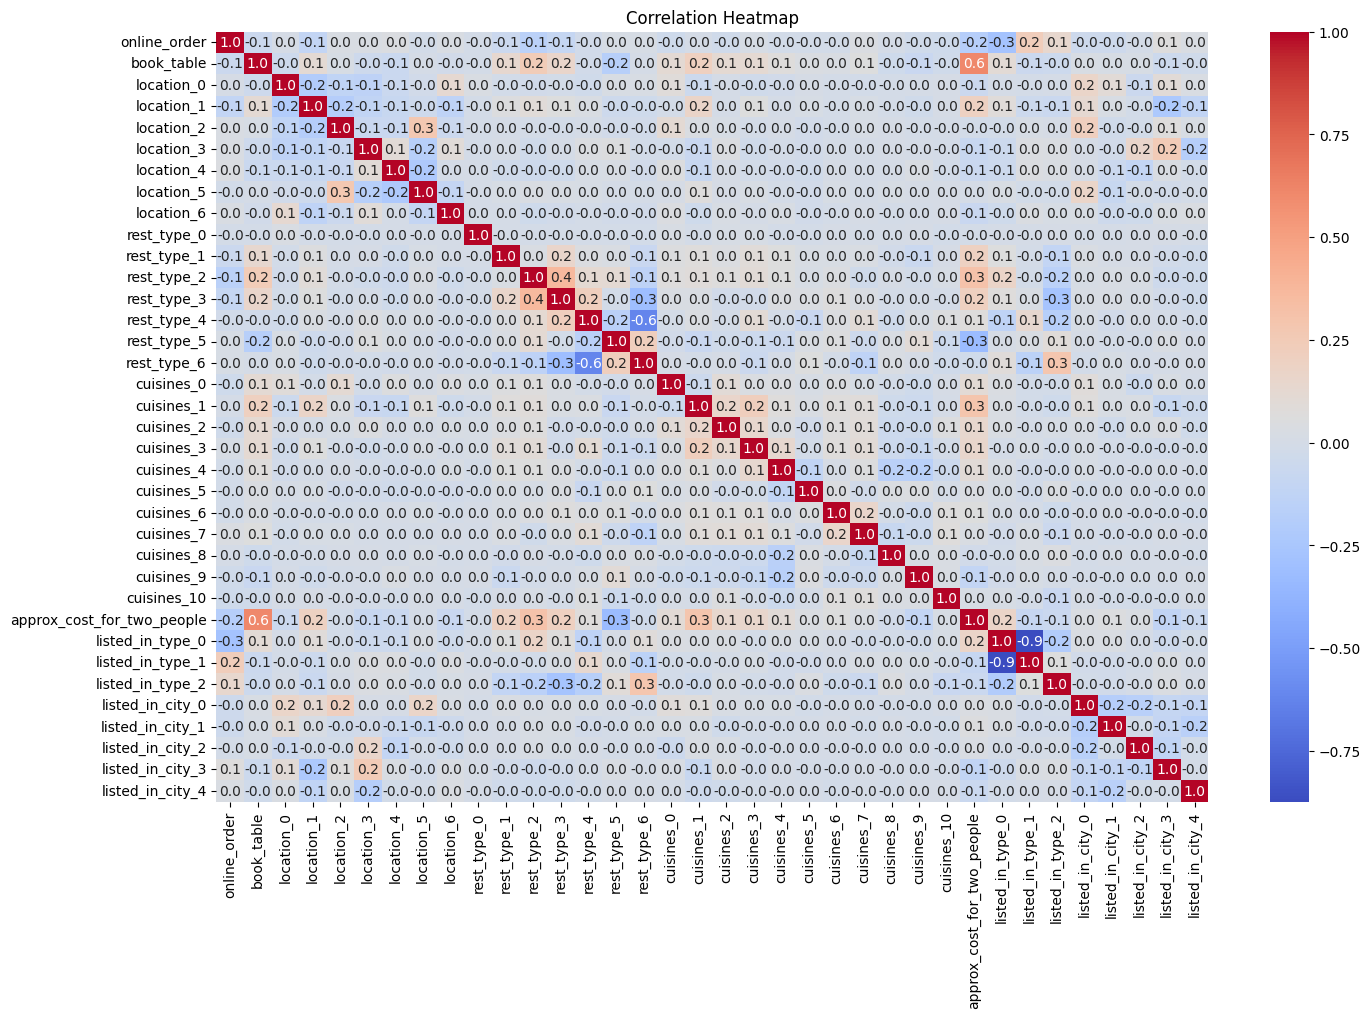

In [19]:
# Compute correlation matrix and visualize the correlation heatmap
correlation_matrix = x_encoded.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Heatmap')
plt.show()

#### After checking the corrleation heat map there is -9 negitive correlation between listed_in_type_0 & listed_in_type_1 we will try to keep it as it is and check the models results first then drop it  and evaluate the model results for both results.

### 6.  Encoder Creation and Evaluation:
* Creating an encoder using a column transformer to use it in a pipeline with different encoder types and then checking model accuracy.

In [20]:
# checking the categorical list to be used in the column transformer
categorical_cols

['location', 'rest_type', 'cuisines', 'listed_in_type', 'listed_in_city']

In [21]:
# Creating the encoder using ColumnTransformer with remainder="passthrough" to pass numerical features
binary_encoder = ColumnTransformer(transformers=[("Binary",BinaryEncoder(), ['location', 'rest_type', 'cuisines', 'listed_in_type', 'listed_in_city'])], remainder="passthrough")

In [22]:
# Checking the shape after encoding.
binary_encoder.fit_transform(x,y).shape

(39950, 36)

### 7.  Pipeline Creation and Model Evaluation:
* Creating pipe line using encoder and Scaler with different type of models 

In [23]:
# Creating list of models to compare between them
models = []
models.append(("LR", LogisticRegression()))
models.append(("GNB", GaussianNB()))
models.append(("BNB", BernoulliNB()))
models.append(("DTC", DecisionTreeClassifier()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("XGC", XGBClassifier()))
models.append(("Bagging", BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=10)))

In [25]:
# Creating pipe line using encoder and RobustScaler() as the numerical features like cost for two contains outliers.
for model in models:
    steps = []
    steps.append(('binary_encoder',binary_encoder))
    steps.append(('Scaler', RobustScaler()))
    steps.append(model)
    pipline = Pipeline(steps=steps)
    scoring = {'accuracy':make_scorer(accuracy_score),'precision':make_scorer(precision_score),'recall':make_scorer(recall_score)}  
    res = cross_validate(pipline, x,y, cv=5, scoring=scoring, return_train_score=True)
    print(f"Model {model[0]} train acc is {res['train_accuracy'].mean()}")
    print(f"Model {model[0]} test acc is {res['test_accuracy'].mean()}")
    print(f"Model {model[0]} test precision is {res['test_precision'].mean()}")
    print(f"Model {model[0]} test recall is {res['test_recall'].mean()}")
    print("*" * 100)

Model LR train acc is 0.700331664580726
Model LR test acc is 0.6868085106382978
Model LR test precision is 0.74974043734879
Model LR test recall is 0.5506256299413761
****************************************************************************************************
Model GNB train acc is 0.596595744680851
Model GNB test acc is 0.5868085106382978
Model GNB test precision is 0.633128502675929
Model GNB test recall is 0.72951494530096
****************************************************************************************************
Model BNB train acc is 0.6702503128911138
Model BNB test acc is 0.6644305381727159
Model BNB test precision is 0.6978641521818778
Model BNB test recall is 0.5665371288683007
****************************************************************************************************
Model DTC train acc is 0.9881789737171465
Model DTC test acc is 0.8670588235294117
Model DTC test precision is 0.8671436324330856
Model DTC test recall is 0.8632307881764859
************

* From the above results the Random Forest Calssifier model show the best results almost 98.8% avg. Train Score , 88.7% avg. test score, 93% avg. test precision score , 83% agv. test recall score. As the avg. train 99% score and avg.test score 89% which suggests overfitting.
* I would like to try different type of encoding & check the results

## - As the correlation heat map show higly negtive corr in 'listed_in_type' we will try to drop it & check models results.

In [26]:
# Creating df2 as copy of the data for checking 
df2 = data.copy()
df2.drop('listed_in_type',axis=1,inplace=True) 
#checking for duplication in data 
df2.duplicated().sum()

14726

In [27]:
# Drop duplicates and reset the index
df2 = df2.drop_duplicates().reset_index(drop=True)
#checking for duplication in data 
df2.duplicated().sum()

0

In [28]:
# divede df2 to x2 = features & y2 = target
x2 = df2.drop("target", axis = 1)
y2 = df2["target"]

In [29]:
# checking the balance of df2
y2.value_counts()

0    13686
1    11538
Name: target, dtype: int64

* The target class is not highly imbalanced but we can maintain it using Random over Sampler.

In [30]:
# using RandomOverSampler to maintain imbalance
sampler = RandomOverSampler()
x2,y2 = sampler.fit_resample(x2,y2)
# checking the balance of df2 after resampling
y2.value_counts()

1    13686
0    13686
Name: target, dtype: int64

In [32]:
# Identify categorical columns
categorical_cols2 = x2.select_dtypes(include=['object']).columns.tolist()
categorical_cols2

['location', 'rest_type', 'cuisines', 'listed_in_city']

In [35]:
Binary_encoder2 = BinaryEncoder(cols=categorical_cols2,return_df=True)
x2_encoded = Binary_encoder2.fit_transform(x2)
x2_encoded.head()

,online_order,book_table,location_0,location_1,location_2,location_3,location_4,location_5,location_6,rest_type_0,...,cuisines_7,cuisines_8,cuisines_9,cuisines_10,approx_cost_for_two_people,listed_in_city_0,listed_in_city_1,listed_in_city_2,listed_in_city_3,listed_in_city_4
0,1,1,0,0,0,0,0,0,1,0,...,0,0,0,1,800,0,0,0,0,1
1,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,800,0,0,0,0,1
2,1,0,0,0,0,0,0,0,1,0,...,0,0,1,1,800,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,300,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,600,0,0,0,0,1


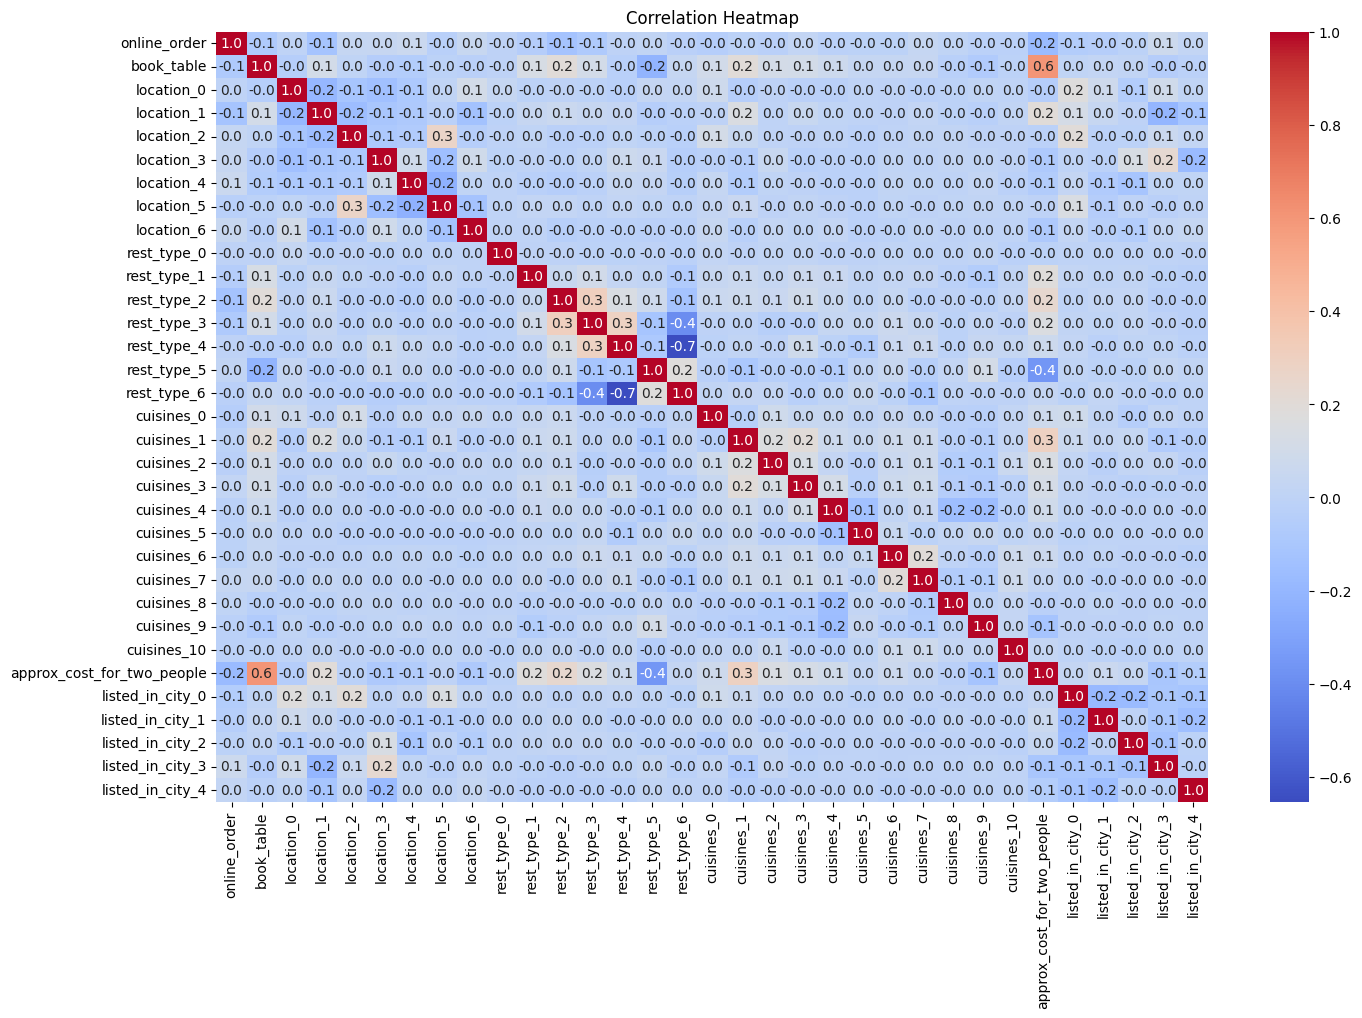

In [36]:
# Compute correlation matrix and visualize the correlation heatmap
correlation_matrix = x2_encoded.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Heatmap')
plt.show()

* the correlation heatmap look good there are no highly correlated features of 0.8 corr or above

In [37]:
# Creating the encoder using ColumnTransformer with remainder="passthrough" to pass numerical features
binary_encoder2 = ColumnTransformer(transformers=[("Binary",BinaryEncoder(), ['location', 'rest_type', 'cuisines', 'listed_in_city'])], remainder="passthrough")

In [38]:
# Creating pipe line using binary_encoder2 and RobustScaler() as the numerical features like cost for two contains outliers.
for model in models:
    steps = []
    steps.append(('binary_encoder2',binary_encoder2))
    steps.append(('Scaler', RobustScaler()))
    steps.append(model)
    pipline = Pipeline(steps=steps)
    scoring = {'accuracy':make_scorer(accuracy_score),'precision':make_scorer(precision_score),'recall':make_scorer(recall_score)}  
    res = cross_validate(pipline, x2,y2, cv=5, scoring=scoring, return_train_score=True)
    print(f"Model {model[0]} train acc is {res['train_accuracy'].mean()}")
    print(f"Model {model[0]} test acc is {res['test_accuracy'].mean()}")
    print(f"Model {model[0]} test precision is {res['test_precision'].mean()}")
    print(f"Model {model[0]} test recall is {res['test_recall'].mean()}")
    print("*" * 100)

Model LR train acc is 0.6860660893650861
Model LR test acc is 0.5543575591046424
Model LR test precision is 0.5652441124928206
Model LR test recall is 0.5498233631433328
****************************************************************************************************
Model GNB train acc is 0.5715150765659464
Model GNB test acc is 0.5407331961968825
Model GNB test precision is 0.5919197905121221
Model GNB test recall is 0.7005507141402628
****************************************************************************************************
Model BNB train acc is 0.650062083980366
Model BNB test acc is 0.5967758586460195
Model BNB test precision is 0.6171927016742667
Model BNB test recall is 0.511978746464127
****************************************************************************************************
Model DTC train acc is 0.9858340616641602
Model DTC test acc is 0.7078692098638145
Model DTC test precision is 0.6806819459956167
Model DTC test recall is 0.820907387949622
********

* When we  dro 'listed_in_type' features the models results become worst than without dropping it. so it is better to keep this feature.  

## - Trying with CatBoostEncoder 

In [39]:
# checking with CatboostEncoder
cat_encoder = CatBoostEncoder(cols=categorical_cols,return_df=True)
x_cat_encoder= cat_encoder.fit_transform(x,y)
x_cat_encoder.head()

,online_order,book_table,location,rest_type,cuisines,approx_cost_for_two_people,listed_in_type,listed_in_city
0,1,1,0.493967,0.493967,0.493967,800,0.493967,0.493967
1,1,0,0.746984,0.746984,0.493967,800,0.746984,0.746984
2,1,0,0.831322,0.493967,0.493967,800,0.831322,0.831322
3,0,0,0.873492,0.493967,0.493967,300,0.873492,0.873492
4,0,0,0.493967,0.831322,0.493967,600,0.698793,0.698793


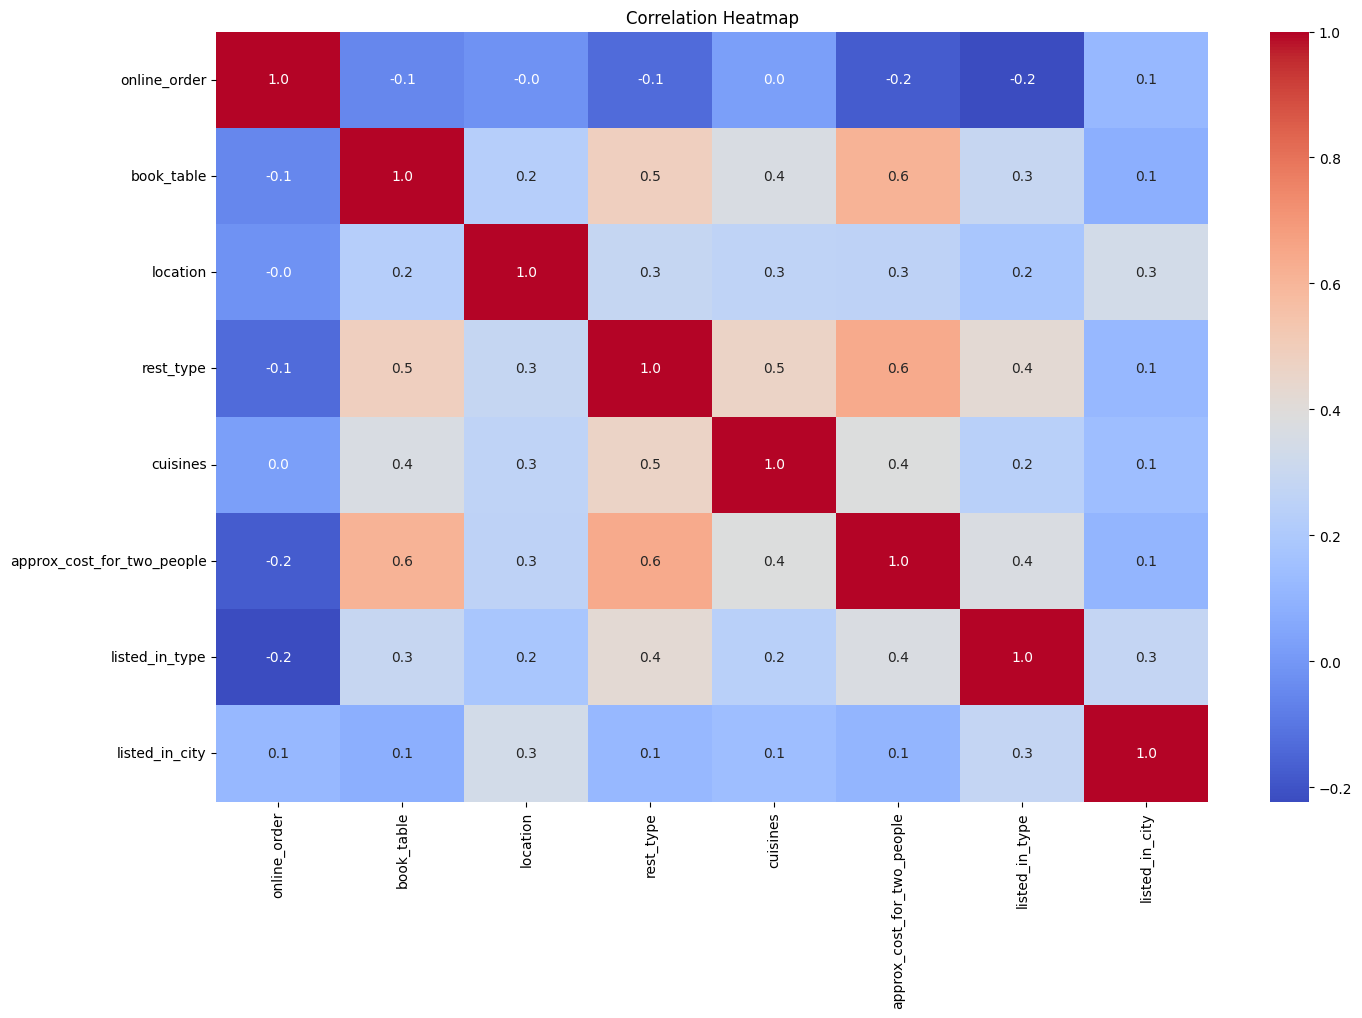

In [40]:
# Compute correlation matrix and visualize the correlation heatmap
correlation_matrix = x_cat_encoder.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Heatmap')
plt.show()

In [41]:
# Creating the encoder using ColumnTransformer with remainder="passthrough" to pass numerical features
cat_encoder = ColumnTransformer(transformers=[("Cat",CatBoostEncoder(), ['location', 'rest_type', 'cuisines', 'listed_in_type', 'listed_in_city'])], remainder="passthrough")

In [42]:
# Creating pipe line using cat_encoder and RobustScaler() as the numerical features contains outliers.
for model in models:
    steps = []
    steps.append(('cat_encoder',cat_encoder))
    steps.append(('Scaler', RobustScaler()))
    steps.append(model)
    pipline = Pipeline(steps=steps)
    scoring = {'accuracy':make_scorer(accuracy_score),'precision':make_scorer(precision_score),'recall':make_scorer(recall_score)}  
    res = cross_validate(pipline, x,y, cv=5, scoring=scoring, return_train_score=True)
    print(f"Model {model[0]} train acc is {res['train_accuracy'].mean()}")
    print(f"Model {model[0]} test acc is {res['test_accuracy'].mean()}")
    print(f"Model {model[0]} test precision is {res['test_precision'].mean()}")
    print(f"Model {model[0]} test recall is {res['test_recall'].mean()}")
    print("*" * 100)

Model LR train acc is 0.7888172715894869
Model LR test acc is 0.7608760951188986
Model LR test precision is 0.8146423327873477
Model LR test recall is 0.6680867284730998
****************************************************************************************************
Model GNB train acc is 0.7467709637046308
Model GNB test acc is 0.727459324155194
Model GNB test precision is 0.856100804142933
Model GNB test recall is 0.5400345762293111
****************************************************************************************************
Model BNB train acc is 0.7283416770963704
Model BNB test acc is 0.7142678347934919
Model BNB test precision is 0.7585056012487064
Model BNB test recall is 0.6186305599369034
****************************************************************************************************
Model DTC train acc is 0.7639111389236547
Model DTC test acc is 0.703404255319149
Model DTC test precision is 0.7120958318464066
Model DTC test recall is 0.671786600741631
*********

* There are no enhancement after using different type of incoder like CatBoost Encoder, TargetEncoder, and CountEncoder it is better to keep using Binary Encoder with random forest classifier model as it is show best results during testing.

### 8.   Hyperparameter Tuning:
* Utilizing RandomizedSearchCV for hyperparameter tuning for better performance and generalization of the model.

In [70]:
# Define the parameter grid
param_dist = {
    'rf__n_estimators': list(range(100, 300)),
    'rf__max_depth': list(range(1, 20)),
    'rf__min_samples_split': list(range(2, 5)),
    'rf__min_samples_leaf': list(range(1, 5)),
    'rf__max_features': ['auto', 'sqrt', 'log2', None]
}

# Create pipline
steps = []
steps.append(('binary_encoder',binary_encoder))
steps.append(('Scaler', RobustScaler()))
steps.append(('rf', RandomForestClassifier()))
pipline = Pipeline(steps=steps)
     
# Use RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(pipline, param_distributions=param_dist,n_iter=200 ,cv=5, scoring='accuracy', n_jobs=-1,random_state=42)
random_search.fit(x, y)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('binary_encoder',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Binary',
                                                                               BinaryEncoder(),
                                                                               ['location',
                                                                                'rest_type',
                                                                                'cuisines',
                                                                                'listed_in_type',
                                                                                'listed_in_city'])])),
                                             ('Scaler', RobustScaler()),
                                             ('rf', RandomForestClassifier())]),
     

In [71]:
# Checking best paramaters
random_search.best_params_

{'rf__n_estimators': 252,
 'rf__min_samples_split': 2,
 'rf__min_samples_leaf': 1,
 'rf__max_features': None,
 'rf__max_depth': 19}

In [72]:
# Checking random search best scores as it reflect the potential for the model to perform well on unseen data 
random_search.best_score_

0.9051314142678347

In [73]:
# Creating model using best estemater.
model = random_search.best_estimator_
model

Pipeline(steps=[('binary_encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Binary', BinaryEncoder(),
                                                  ['location', 'rest_type',
                                                   'cuisines', 'listed_in_type',
                                                   'listed_in_city'])])),
                ('Scaler', RobustScaler()),
                ('rf',
                 RandomForestClassifier(max_depth=19, max_features=None,
                                        n_estimators=252))])

In [24]:
model = RandomForestClassifier(n_estimators=252,min_samples_split=2,min_samples_leaf=1,max_depth=19,max_features=None)
steps = []
steps.append(('binary_encoder',binary_encoder))
steps.append(('Scaler', RobustScaler()))
steps.append(('rf', RandomForestClassifier(max_depth=19, max_features=None,n_estimators=252,min_samples_split=2,min_samples_leaf=1)))
pipline = Pipeline(steps=steps)
scoring = {'accuracy':make_scorer(accuracy_score),'precision':make_scorer(precision_score),'recall':make_scorer(recall_score)}  
res = cross_validate(pipline, x,y, cv=5, scoring=scoring, return_train_score=True)
print(f"train acc is {res['train_accuracy'].mean()}")
print(f"test acc is {res['test_accuracy'].mean()}")
print(f"test precision is {res['test_precision'].mean()}")
print(f"test recall is {res['test_recall'].mean()}")

train acc is 0.9855006257822279
test acc is 0.9057071339173968
test precision is 0.9287440683276446
test recall is 0.8764061087668065


In [25]:
res

{'fit_time': array([26.19029999, 26.54313684, 26.70701241, 31.27551031, 29.71538949]),
 'score_time': array([0.43079901, 0.43354249, 0.44764256, 0.47871971, 0.45011425]),
 'test_accuracy': array([0.90801001, 0.88122653, 0.88961202, 0.94380476, 0.90588235]),
 'train_accuracy': array([0.98513767, 0.98595119, 0.98554443, 0.98579474, 0.98507509]),
 'test_precision': array([0.94438296, 0.90911572, 0.90023505, 0.95929622, 0.9306904 ]),
 'train_precision': array([0.99431818, 0.99179171, 0.99279696, 0.99305422, 0.991588  ]),
 'test_recall': array([0.86470737, 0.8439321 , 0.87332151, 0.92551305, 0.87455651]),
 'train_recall': array([0.97548616, 0.97966681, 0.97782986, 0.97808323, 0.97808462])}

In [26]:
rf_model = pipline.fit(x,y)

### 9. Model Saving and Deployment Preparation:
* Using joblib to dump model with best estimator, column name in or (Features), and As the categorical value show high uniqueness it is better create dummy file dictonery to maintain deployment step code clearance.

In [27]:
# using joblib to dump the model pipeline with random_search best_estimator as pkl file.
# using jolbib to dump the model pipeline as h5 as pkl give me large file not accepted to load on github
joblib.dump(rf_model,'../models/rf_model.pkl',compress=3)

['../models/rf_model.pkl']

In [75]:
# Creating features names in list and save it as pkl file for deployment step
features = x.columns.to_list()
print(features)
joblib.dump(features,'../models/features.pkl')

['online_order', 'book_table', 'location', 'rest_type', 'cuisines', 'approx_cost_for_two_people', 'listed_in_type', 'listed_in_city']


['../models/features.pkl']

In [76]:
# creating dummies dictionery for categorical values list then save it for the deployment step using joblib
dummies_dict = {}
dummies_dict['location'] = df.location.unique().tolist()
dummies_dict['rest_type'] = df.rest_type.unique().tolist()
dummies_dict['cuisines'] = df.cuisines.unique().tolist()
dummies_dict['listed_in_type'] = df.listed_in_type.unique().tolist()
dummies_dict['listed_in_city'] = df.listed_in_city.unique().tolist()
joblib.dump(dummies_dict,'../models/dummies_dict.pkl')

['../models/dummies_dict.pkl']

# Preprocessing & Modeling summery:

### **1. Creating Target Column:**

* A target column was created to label a restaurant's success as "good" (1) if its rating is 3.75 or higher, and "not good" (0) otherwise.

### **2. Removing Irrelevant Columns:**

* Columns deemed irrelevant for predicting restaurant success were removed:
* 'address' (high unique values, the model aims to focus on general location rather than specific addresses)
* 'name' (no predictive relevance)
* 'rate' and 'votes' (collected after project completion)

### **3. Data Splitting and Class Imbalance:**

* The dataset was divided into features (x) and the target variable (y).
* The target class was found to be almost balanced, requiring no imbalance handling.

### **4. Handling Categorical Variables:**

* Binary encoding and CatBoostEncoder were tested for handling categorical variables.
* Binary encoding produced the best results during modeling.

### **5. Correlation Analysis and Feature Selection:**

* A correlation heatmap was generated to identify highly correlated features.
* Dropping the 'listed_in_type' feature initially considered, but it was retained due to negative model performance impact.

### **6. Encoder Creation and Evaluation:**

* A column transformer was used to create an encoder with different encoding types.
* Binary encoder was found to yield the best model accuracy scores.

### **7. Pipeline Creation and Model Evaluation:**

* A pipeline was constructed incorporating encoders, scalers, and various models for evaluation.
* Random Forest Classifier demonstrated the best results:
  * Average train score: 98.8%
  * Average test score: 88.7%
  * Average test precision score: 93%
  * Average test recall score: 83%
  * Overfitting was observed, but Random Forest still yielded the best test performance among tested models.
  
### **8. Hyperparameter Tuning:**

* RandomizedSearchCV was employed for hyperparameter tuning to enhance model performance and generalization.
* Optimal parameters for Random Forest Classifier: {'rf__n_estimators': 252, 'rf__min_samples_split': 2, 'rf__min_samples_leaf': 1, 'rf__max_features': None, 'rf__max_depth': 19}
* Best score achieved: 90.5%

### **9. Model Saving and Deployment Preparation:**

* joblib was used to save the best model, along with column names and a dummy file dictionary for code clarity during deployment.

## Conclusion:

The data preprocessing and modeling steps aimed to create a robust model to predict the success or goodness of restaurants in Bangalore. We focused on relevant features and utilized binary encoding for categorical variables, achieving optimal results. The Random Forest Classifier emerged as the best-performing model with an average test score of 88.7%. Despite indications of overfitting, it provided the most favorable test results. Hyperparameter tuning using RandomizedSearchCV improved the model's performance, resulting in a 90.5% best score. The model, along with its best parameters, was saved using joblib. The preprocessing steps, feature engineering, and model development contribute to a comprehensive framework for predicting restaurant success in Bangalore.